# developing a model to predict taxi fare

## Importing the required packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn import tree
from os import system

In [2]:
df=pd.read_csv('train_data_iitm.csv')

In [3]:
df.shape

(60000, 12)

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5
1,NaN,2020-06-13 06:19:00,2020-06-13 06:37:00,NaN,11.58,NaN,NaN,56,42,NaN,28.81,0.0
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5


In [5]:
df.info() #total 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               54365 non-null  float64
 1   tpep_pickup_datetime   60000 non-null  object 
 2   tpep_dropoff_datetime  60000 non-null  object 
 3   passenger_count        54365 non-null  float64
 4   trip_distance          60000 non-null  float64
 5   RatecodeID             54365 non-null  float64
 6   store_and_fwd_flag     54365 non-null  object 
 7   PULocationID           60000 non-null  int64  
 8   DOLocationID           60000 non-null  int64  
 9   payment_type           54365 non-null  float64
 10  fare_amount            60000 non-null  float64
 11  congestion_surcharge   60000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.5+ MB


# Cleaning and Visualising the data

In [6]:
df.isnull().sum() #checking number of null values

VendorID                 5635
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          5635
trip_distance               0
RatecodeID               5635
store_and_fwd_flag       5635
PULocationID                0
DOLocationID                0
payment_type             5635
fare_amount                 0
congestion_surcharge        0
dtype: int64

<AxesSubplot:>

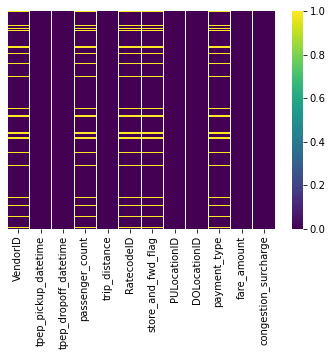

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

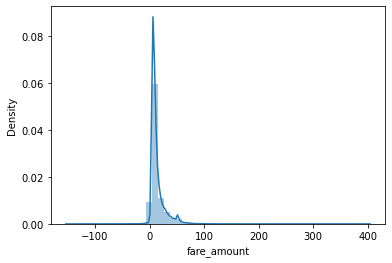

In [61]:
sns.distplot(df.fare_amount)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

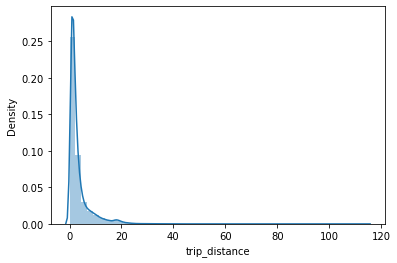

In [8]:
sns.distplot(df.trip_distance )  

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PULocationID', ylabel='Density'>

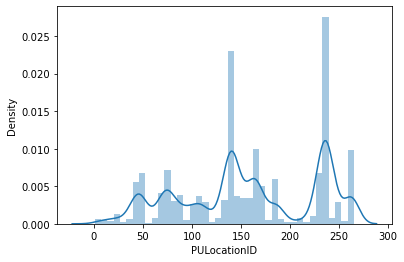

In [9]:
sns.distplot(df.PULocationID )  

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DOLocationID', ylabel='Density'>

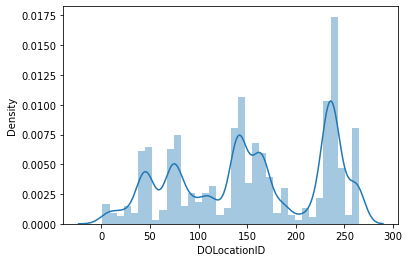

In [10]:
sns.distplot(df.DOLocationID )

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='congestion_surcharge', ylabel='Density'>

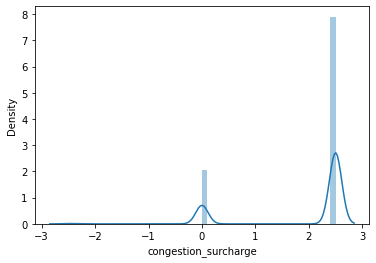

In [11]:
sns.distplot(df.congestion_surcharge)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VendorID', ylabel='Density'>

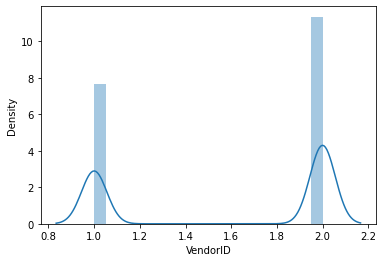

In [12]:
#lets try to fill the missing values of vendor id
sns.distplot(df.VendorID )                      # looks like vendor id 2 is of higher density 

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN)      #replacing the missing value with 2
df['VendorID'].fillna(2, inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5
1,2.0,2020-06-13 06:19:00,2020-06-13 06:37:00,NaN,11.58,NaN,NaN,56,42,NaN,28.81,0.0
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='passenger_count', ylabel='Density'>

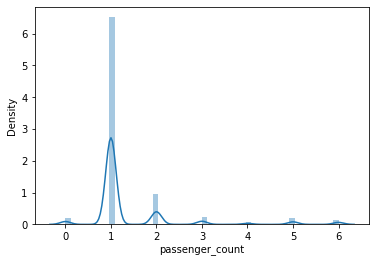

In [14]:
#lets try to fill the missing values of passenger count
sns.distplot(df.passenger_count)                      # easily seen that 1 is of majority

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

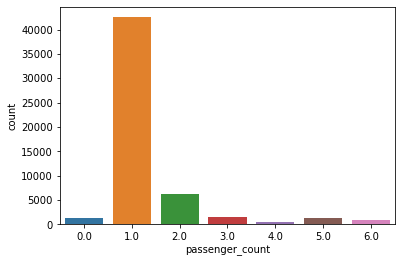

In [15]:
sns.countplot(x="passenger_count",data=df) #countplot for better visualisation

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN)  # replacing the missing value with 1
df['passenger_count'].fillna(1, inplace=True)

<AxesSubplot:xlabel='RatecodeID', ylabel='count'>

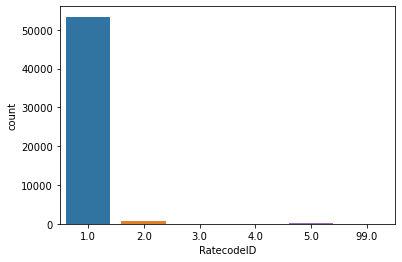

In [17]:
#lets try to fill the missing values of RatecodeID
sns.countplot(x="RatecodeID",data=df)   #1 is of very high majority

In [18]:
df['RatecodeID'].fillna(1, inplace=True)   #replacing the missing values with 1
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5
1,2.0,2020-06-13 06:19:00,2020-06-13 06:37:00,1.0,11.58,1.0,NaN,56,42,NaN,28.81,0.0
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1.0,2020-06-25 17:49:12,2020-06-25 17:54:26,1.0,1.70,1.0,N,229,107,1.0,7.00,2.5
59996,2.0,2020-06-04 11:55:05,2020-06-04 12:05:04,1.0,2.36,1.0,N,79,186,2.0,9.50,2.5
59997,1.0,2020-06-21 21:26:45,2020-06-21 21:32:33,1.0,1.40,1.0,N,186,233,1.0,6.50,2.5
59998,2.0,2020-06-27 17:08:27,2020-06-27 17:15:33,2.0,3.18,1.0,N,262,233,1.0,11.00,2.5


<AxesSubplot:xlabel='payment_type', ylabel='count'>

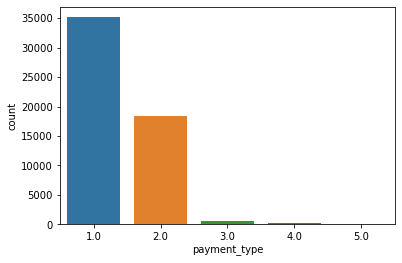

In [19]:
#lets try to fill the missing values of RatecodeID
sns.countplot(x="payment_type",data=df) #1 is of very high majority

In [20]:
df['payment_type'].fillna(1, inplace=True) #replacing the missing values with 1
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5
1,2.0,2020-06-13 06:19:00,2020-06-13 06:37:00,1.0,11.58,1.0,NaN,56,42,1.0,28.81,0.0
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1.0,2020-06-25 17:49:12,2020-06-25 17:54:26,1.0,1.70,1.0,N,229,107,1.0,7.00,2.5
59996,2.0,2020-06-04 11:55:05,2020-06-04 12:05:04,1.0,2.36,1.0,N,79,186,2.0,9.50,2.5
59997,1.0,2020-06-21 21:26:45,2020-06-21 21:32:33,1.0,1.40,1.0,N,186,233,1.0,6.50,2.5
59998,2.0,2020-06-27 17:08:27,2020-06-27 17:15:33,2.0,3.18,1.0,N,262,233,1.0,11.00,2.5


<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

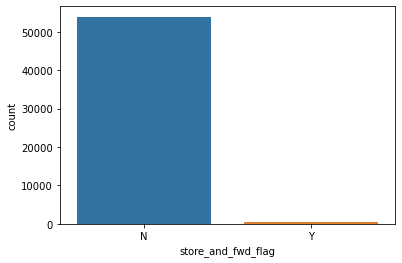

In [21]:
#lets try to fill the missing values of RatecodeID
sns.countplot(x="store_and_fwd_flag",data=df) #"N" is of very high majority

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')  #its seen that mean is better than median here..
 
df.store_and_fwd_flag = imputer.fit_transform(df['store_and_fwd_flag'].values.reshape(-1,1))[:,0]
 
df.head()       #replacing the missing values with the most repeting value i.e, "N"

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5
1,2.0,2020-06-13 06:19:00,2020-06-13 06:37:00,1.0,11.58,1.0,N,56,42,1.0,28.81,0.0
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5


In [23]:
store_and_fwd_flag = pd.get_dummies(df["store_and_fwd_flag"],drop_first=True)
store_and_fwd_flag.head()     #converting categorical values to numerical using dummies

,Y
0,0
1,0
2,0
3,0
4,0


In [24]:
df=pd.concat([df,store_and_fwd_flag],axis=1)                 # adding the dummy columns to the dataset
df.drop(["store_and_fwd_flag"],axis=1,inplace=True)          # and removing the original column

In [25]:
df.drop(["tpep_pickup_datetime","tpep_dropoff_datetime"],axis=1,inplace=True)
df.info()   #Dropping the time and date columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VendorID              60000 non-null  float64
 1   passenger_count       60000 non-null  float64
 2   trip_distance         60000 non-null  float64
 3   RatecodeID            60000 non-null  float64
 4   PULocationID          60000 non-null  int64  
 5   DOLocationID          60000 non-null  int64  
 6   payment_type          60000 non-null  float64
 7   fare_amount           60000 non-null  float64
 8   congestion_surcharge  60000 non-null  float64
 9   Y                     60000 non-null  uint8  
dtypes: float64(7), int64(2), uint8(1)
memory usage: 4.2 MB


In [26]:
corr = df.corr()
corr  #  no correlation between independent variables is more than 0.8,so no need to drop any variable

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,Y
VendorID,1.000000,0.190165,0.139594,-0.001001,-0.045867,-0.025274,-0.059381,0.101858,-0.096154,-0.110771
passenger_count,0.190165,1.000000,-0.026953,-0.011751,0.005741,0.008302,0.017751,-0.041056,0.047953,-0.020219
trip_distance,0.139594,-0.026953,1.000000,0.043137,-0.112152,-0.092232,-0.108706,0.867704,-0.280979,-0.004088
RatecodeID,-0.001001,-0.011751,0.043137,1.000000,0.004750,0.020347,0.001283,0.080003,-0.046133,0.044460
PULocationID,-0.045867,0.005741,-0.112152,0.004750,1.000000,0.125250,-0.016847,-0.120242,0.236174,0.000156
DOLocationID,-0.025274,0.008302,-0.092232,0.020347,0.125250,1.000000,-0.017914,-0.094330,0.177673,0.008838
payment_type,-0.059381,0.017751,-0.108706,0.001283,-0.016847,-0.017914,1.000000,-0.151292,-0.064654,0.039811
fare_amount,0.101858,-0.041056,0.867704,0.080003,-0.120242,-0.094330,-0.151292,1.000000,-0.321883,0.007861
congestion_surcharge,-0.096154,0.047953,-0.280979,-0.046133,0.236174,0.177673,-0.064654,-0.321883,1.000000,-0.014866
Y,-0.110771,-0.020219,-0.004088,0.044460,0.000156,0.008838,0.039811,0.007861,-0.014866,1.000000


<AxesSubplot:>

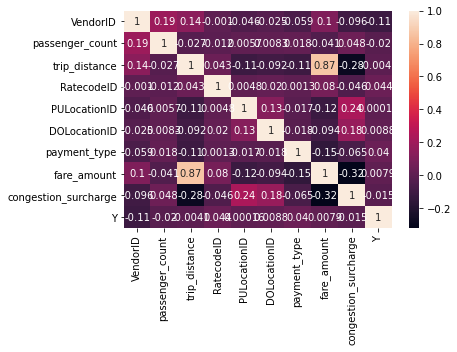

In [27]:
sns.heatmap(corr,annot=True)

# Loading the test data

In [28]:
df1=pd.read_csv('test_data_iitm.csv')
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               9071 non-null   float64
 1   tpep_pickup_datetime   10000 non-null  object 
 2   tpep_dropoff_datetime  10000 non-null  object 
 3   passenger_count        9071 non-null   float64
 4   trip_distance          10000 non-null  float64
 5   RatecodeID             9071 non-null   float64
 6   store_and_fwd_flag     9071 non-null   object 
 7   PULocationID           10000 non-null  int64  
 8   DOLocationID           10000 non-null  int64  
 9   payment_type           9071 non-null   float64
 10  congestion_surcharge   10000 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [29]:
df1.drop(["tpep_pickup_datetime","tpep_dropoff_datetime"],axis=1,inplace=True)
df1.info()                    #Dropping the time and date columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VendorID              9071 non-null   float64
 1   passenger_count       9071 non-null   float64
 2   trip_distance         10000 non-null  float64
 3   RatecodeID            9071 non-null   float64
 4   store_and_fwd_flag    9071 non-null   object 
 5   PULocationID          10000 non-null  int64  
 6   DOLocationID          10000 non-null  int64  
 7   payment_type          9071 non-null   float64
 8   congestion_surcharge  10000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 703.2+ KB


# Cleaning and visualising the testing data

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VendorID', ylabel='Density'>

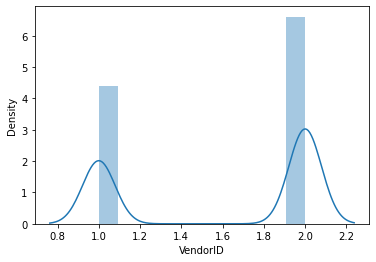

In [30]:
#lets try to fill the missing values of vendor id
sns.distplot(df1.VendorID )                      # looks like vendor id 2 is of higher density 

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN)  # replacing the missing value with 2
df1['VendorID'].fillna(2, inplace=True)
df1

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,congestion_surcharge
0,2.0,1.0,1.66,1.0,N,48,90,1.0,2.5
1,2.0,3.0,1.50,1.0,N,48,246,2.0,2.5
2,1.0,1.0,1.90,1.0,N,237,234,1.0,2.5
3,2.0,1.0,0.27,1.0,N,170,170,2.0,2.5
4,2.0,2.0,4.06,1.0,N,186,238,2.0,2.5
...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.00,1.0,N,74,74,3.0,0.0
9996,2.0,1.0,0.54,1.0,N,141,237,1.0,2.5
9997,2.0,1.0,1.14,1.0,N,41,74,1.0,0.0
9998,2.0,1.0,2.92,1.0,N,88,65,1.0,2.5


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='passenger_count', ylabel='Density'>

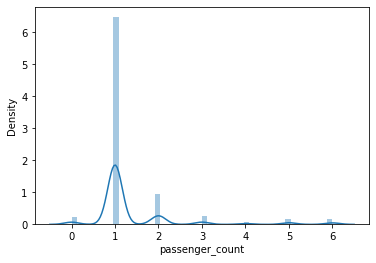

In [32]:
#lets try to fill the missing values of passenger count
sns.distplot(df1.passenger_count)                      # easily seen that 1 is of majority

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN)  # replacing the missing value with 1
df1['passenger_count'].fillna(1, inplace=True)
df1

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,congestion_surcharge
0,2.0,1.0,1.66,1.0,N,48,90,1.0,2.5
1,2.0,3.0,1.50,1.0,N,48,246,2.0,2.5
2,1.0,1.0,1.90,1.0,N,237,234,1.0,2.5
3,2.0,1.0,0.27,1.0,N,170,170,2.0,2.5
4,2.0,2.0,4.06,1.0,N,186,238,2.0,2.5
...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.00,1.0,N,74,74,3.0,0.0
9996,2.0,1.0,0.54,1.0,N,141,237,1.0,2.5
9997,2.0,1.0,1.14,1.0,N,41,74,1.0,0.0
9998,2.0,1.0,2.92,1.0,N,88,65,1.0,2.5


<AxesSubplot:xlabel='RatecodeID', ylabel='count'>

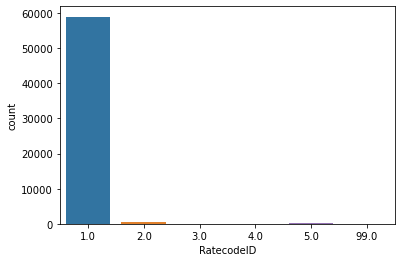

In [34]:
#lets try to fill the missing values of RatecodeID
sns.countplot(x="RatecodeID",data=df)   #1 is of very high majority

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN)  # replacing the missing value with 1
df1['RatecodeID'].fillna(1, inplace=True)
df1

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,congestion_surcharge
0,2.0,1.0,1.66,1.0,N,48,90,1.0,2.5
1,2.0,3.0,1.50,1.0,N,48,246,2.0,2.5
2,1.0,1.0,1.90,1.0,N,237,234,1.0,2.5
3,2.0,1.0,0.27,1.0,N,170,170,2.0,2.5
4,2.0,2.0,4.06,1.0,N,186,238,2.0,2.5
...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.00,1.0,N,74,74,3.0,0.0
9996,2.0,1.0,0.54,1.0,N,141,237,1.0,2.5
9997,2.0,1.0,1.14,1.0,N,41,74,1.0,0.0
9998,2.0,1.0,2.92,1.0,N,88,65,1.0,2.5


<AxesSubplot:xlabel='payment_type', ylabel='count'>

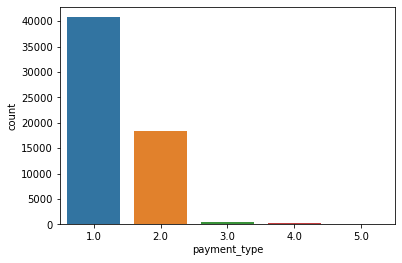

In [36]:
#lets try to fill the missing values of RatecodeID
sns.countplot(x="payment_type",data=df)        #1 is of very high majority

In [37]:
df1['payment_type'].fillna(1, inplace=True)
df1      # replacing the missing value with 1

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,congestion_surcharge
0,2.0,1.0,1.66,1.0,N,48,90,1.0,2.5
1,2.0,3.0,1.50,1.0,N,48,246,2.0,2.5
2,1.0,1.0,1.90,1.0,N,237,234,1.0,2.5
3,2.0,1.0,0.27,1.0,N,170,170,2.0,2.5
4,2.0,2.0,4.06,1.0,N,186,238,2.0,2.5
...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.00,1.0,N,74,74,3.0,0.0
9996,2.0,1.0,0.54,1.0,N,141,237,1.0,2.5
9997,2.0,1.0,1.14,1.0,N,41,74,1.0,0.0
9998,2.0,1.0,2.92,1.0,N,88,65,1.0,2.5


<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

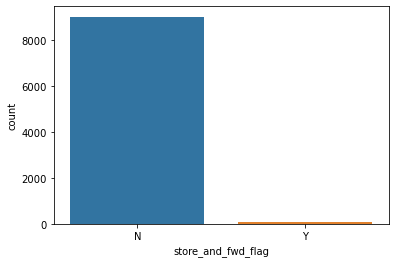

In [38]:
sns.countplot(x="store_and_fwd_flag",data=df1) #easily seen that "N" is most repeating here

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')  # replacing the missing values with "N"
 
df1.store_and_fwd_flag = imputer.fit_transform(df1['store_and_fwd_flag'].values.reshape(-1,1))[:,0]
 
df1

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,congestion_surcharge
0,2.0,1.0,1.66,1.0,N,48,90,1.0,2.5
1,2.0,3.0,1.50,1.0,N,48,246,2.0,2.5
2,1.0,1.0,1.90,1.0,N,237,234,1.0,2.5
3,2.0,1.0,0.27,1.0,N,170,170,2.0,2.5
4,2.0,2.0,4.06,1.0,N,186,238,2.0,2.5
...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.00,1.0,N,74,74,3.0,0.0
9996,2.0,1.0,0.54,1.0,N,141,237,1.0,2.5
9997,2.0,1.0,1.14,1.0,N,41,74,1.0,0.0
9998,2.0,1.0,2.92,1.0,N,88,65,1.0,2.5


In [40]:
store_and_fwd_flag = pd.get_dummies(df1["store_and_fwd_flag"],drop_first=True)
store_and_fwd_flag.head()  #converting categorical values to numerical using dummies

,Y
0,0
1,0
2,0
3,0
4,0


In [41]:
df1=pd.concat([df1,store_and_fwd_flag],axis=1) #adding the dummy columns to the dataset
df1.drop(["store_and_fwd_flag"],axis=1,inplace=True) #and dropping the original column

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VendorID              10000 non-null  float64
 1   passenger_count       10000 non-null  float64
 2   trip_distance         10000 non-null  float64
 3   RatecodeID            10000 non-null  float64
 4   PULocationID          10000 non-null  int64  
 5   DOLocationID          10000 non-null  int64  
 6   payment_type          10000 non-null  float64
 7   congestion_surcharge  10000 non-null  float64
 8   Y                     10000 non-null  uint8  
dtypes: float64(6), int64(2), uint8(1)
memory usage: 634.9 KB



# Modelling the data

In [43]:
X= df.drop("fare_amount",axis=1)
y= df["fare_amount"]     #taking fare_amount as the dependent variable and others as independent variable

### Splitting the data into training and testing as 70%-30%

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
model =  LinearRegression().fit(X_train,y_train)
model.score(X_train, y_train)   #has the problem of over-fitting
model.score(X_test, y_test)

0.7841857753211016

# Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
x_train2 = poly.fit_transform(X_train)
x_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)            #model is good in training and testing

y_pred = poly_clf.predict(x_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train2, y_train))
print(poly_clf.score(x_test2, y_test))

0.81192556503121
0.8106435318784664


# Decision trees

In [47]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
 
# create a regressor object
dTree = DecisionTreeRegressor( max_depth =6,random_state = 42)
 
# fit the regressor with X and Y data                   # by far the best model!
dTree.fit(X_train, y_train)

print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

pre = dTree.predict(df1)
df1["fare_amount"] = pre
df1

0.853637493697231
0.8222525847844581


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,congestion_surcharge,Y,fare_amount
0,2.0,1.0,1.66,1.0,48,90,1.0,2.5,0,8.936279
1,2.0,3.0,1.50,1.0,48,246,2.0,2.5,0,6.810380
2,1.0,1.0,1.90,1.0,237,234,1.0,2.5,0,8.936279
3,2.0,1.0,0.27,1.0,170,170,2.0,2.5,0,4.855368
4,2.0,2.0,4.06,1.0,186,238,2.0,2.5,0,16.394855
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.00,1.0,74,74,3.0,0.0,0,3.290310
9996,2.0,1.0,0.54,1.0,141,237,1.0,2.5,0,4.855368
9997,2.0,1.0,1.14,1.0,41,74,1.0,0.0,0,6.810380
9998,2.0,1.0,2.92,1.0,88,65,1.0,2.5,0,11.369839


In [48]:
df1.to_csv("me19b116_J.akshay Kumar_prediction.csv") 

In [49]:
df1.to_csv('me19b116_J.akshay kumar_Predictions.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VendorID              10000 non-null  float64
 1   passenger_count       10000 non-null  float64
 2   trip_distance         10000 non-null  float64
 3   RatecodeID            10000 non-null  float64
 4   PULocationID          10000 non-null  int64  
 5   DOLocationID          10000 non-null  int64  
 6   payment_type          10000 non-null  float64
 7   congestion_surcharge  10000 non-null  float64
 8   Y                     10000 non-null  uint8  
 9   fare_amount           10000 non-null  float64
dtypes: float64(7), int64(2), uint8(1)
memory usage: 713.0 KB


# Support Vector Regression

In [50]:
from sklearn.svm import SVR           # not as good performing as decision trees...
svr = SVR().fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.6804481481490967
0.7074970830235647


# Random forest (ensemble) model

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X_train, y_train = make_regression(n_features=9, n_informative=5, random_state=42, shuffle=False)
RFR = RandomForestRegressor(max_depth=15)
RFR.fit(X, y)
print(RFR.score(X_train, y_train))           # negative score indicating that the model is very bad performing
print(RFR.score(X_test, y_test))

-0.12094723642364835
0.9517739132864129


# so, finally we go with the Decision tree regressor model with a training score of 85.36%, and a testing score of 82.22

# Observations and conclusions

## most of the rides cost around 10-30 dollars

## most of the distance travelled are between 0-20 miles

## most of the pickup and drop locations are in Manhattan and bronx areas

## most common congestion_surcharge is 2.5

## most common Vendor is VeriFone Inc.

## mostly passengers are travelling alone

## standard rate code is the most common among all ones

## credit cards are the most common ways of payment followed by cash

## most of the time the vehicle is connected to servers and is not stored and forward values

## Decision tree regressor proved to be the best model.. followed by polynomial regression model